# Using google trends to quantify environmental affects on human health

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# download from google trends
healthdata=pd.read_csv('Data/cough_denver.csv')

<IPython.core.display.Javascript object>


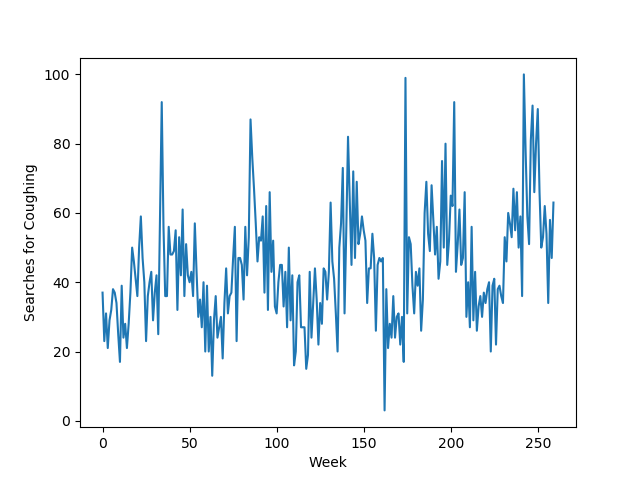

Text(0,0.5,u'Searches for Coughing')

In [6]:
plt.plot(healthdata.index,healthdata['Coughing: (Denver CO)'])
plt.xlabel('Week')
plt.ylabel('Searches for Coughing')

The above graph clearly shows long-term seasonal trends as well as quick spikes, indicating a short-term, rapid event.  

In [4]:
# from https://www.epa.gov/outdoor-air-quality-data/download-daily-data
ozonedata=pd.read_csv('Data/ozone_denver.csv')
ozonedata['week']=ozonedata.index/7

<IPython.core.display.Javascript object>


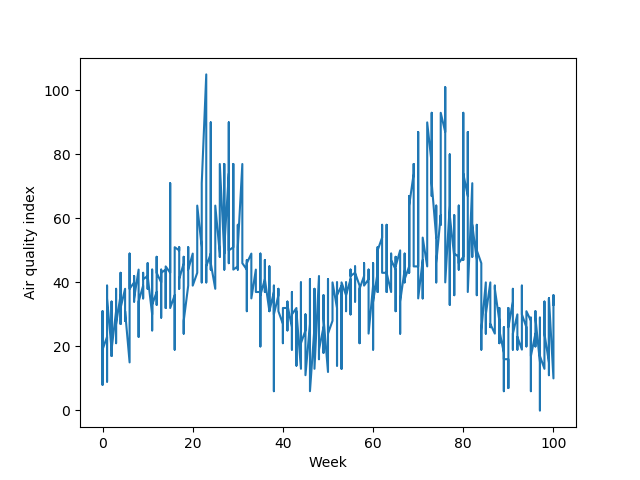

Text(0,0.5,u'Air quality index')

In [7]:
plt.plot(ozonedata['week'],ozonedata['DAILY_AQI_VALUE'])
plt.xlabel('Week')
plt.ylabel('Air quality index')

Suprisingly, the air quality index also shows simlar long term trends to the "cough" serach in google trends.  I assumed the long term trends were due to seasonal cold and flu, but maybe it's primarily the air quality.

# Comparison of air quality and google trends for coughing.

First we will select the range of google trends "coughing" data within the same time frame as our air-quality index.  Then we can plot them together and look for a correlation.

In [48]:
healthdata_selected=healthdata.iloc[139:247]
healthdata_selected_x=healthdata_selected.index.values-139
healthdata_selected_y=healthdata_selected['Coughing: (Denver CO)']

<IPython.core.display.Javascript object>


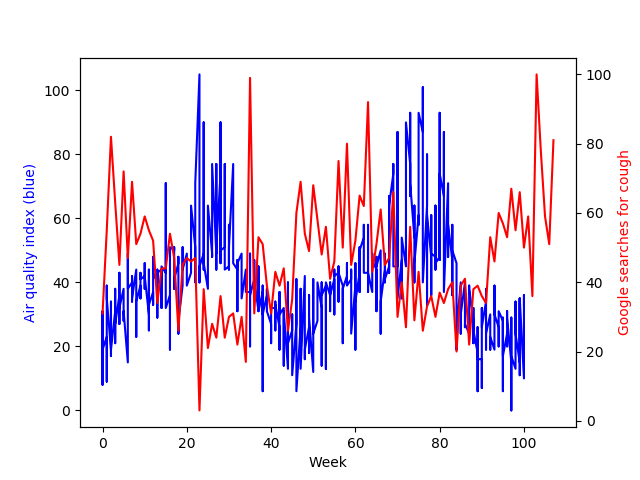

Text(0,0.5,u'Google searches for cough')

In [56]:
ax1 = plt.plot()
plt.plot(ozonedata['week'],ozonedata['DAILY_AQI_VALUE'],'b-')
plt.xlabel('Week')
plt.ylabel('Air quality index (blue)',color='b')

ax2 = plt.gca().twinx() 
ax2.plot(healthdata_selected_x,healthdata_selected_y,'r-')
plt.ylabel('Google searches for cough', color='r')

A very clear anti-correlation between air-quality index and google searchs for cough.  I'm suprised, because I would have thought that seasonal cold/flu would be the dominant factor.  For the main project, I will scale the data so that we can calculate correlation coefficients and use APIs so that I can turn this into a general purpose tool that can look at any region of the country (this is only data for Denver metro). 